In [1]:
from Channel_Modified import Static_Channel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hc = [(0.1,0),(0.25,1),(0.16,2),(0.08,3),(0.04,4)]
#hc = [(1,0)]
channel = Static_Channel(memory_length=len(hc), memory_coeffs=hc,
                                  signal_filter="rc", oversampling_factor=1)
channel.set_snr(2)

sequence = np.array([1,-1,1,1,-1,-1,1,-1])
channel.transmit(sequence)
resp = channel.receive()

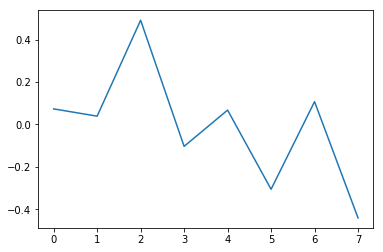

In [3]:
plt.plot(resp)

In [4]:
hc = [(1,0.2)]
channel = Static_Channel(memory_length=len(hc), memory_coeffs=hc,
                                  signal_filter="rc", oversampling_factor=100)
channel.set_snr(2)

sequence = np.array([1,1,1,1,-1])
channel.transmit(sequence)
resp = channel.receive()

/home/stephan/Dokumente/Studium/SHK Arbeit/Workspace/ChannelTest/Channel_Modified.py:171: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  filtered_noise = np.random.multivariate_normal(mean=np.zeros(len(conv_seq)), cov=covariance)


In [5]:
a = np.array([1,2,3])
a**2

array([1, 4, 9])

In [6]:
np.sum(a**2)

14

Das Rauschen des Kanals scheint noch einen hochfrequenten ANteil zu haben, da der FIlter unperfekt abgeschnitten wurde. Die RRC-Funktion hat einen anderen Sitz der Nullstellen, als die RC-Funktion.

In [7]:
def rrc_filter(sampling_freq, roll_off):
    t = np.arange(-1.7,1.7+1/sampling_freq, 1/sampling_freq)
    rrc = np.piecewise(t, [t==0, np.abs(t) == 1/float(4*roll_off), (t!=0) & (np.abs(t) != 1/float(4*roll_off))], [
                        lambda t:(1-roll_off+4*roll_off/np.pi), 
                        lambda t: roll_off/np.sqrt(2)*((1+2/np.pi)*np.sin(np.pi/(4*roll_off))+(1-2/np.pi)*np.cos(np.pi/(4*roll_off))),
                        lambda t: (np.sin(np.pi*t*(1-roll_off))+4*roll_off*t*np.cos(np.pi*t*(1+roll_off)))/(np.pi*t*(1-(4*roll_off*t)**2))])
    return rrc


In [8]:
sampling_freq = 3
t = np.arange(-1.7,1.7+1/sampling_freq, 1/sampling_freq)
print(t)
print(len(t))
t = np.linspace(-1.7,1.7, num=int(3.4*sampling_freq+1))
print(t)
print(len(t))

[-1.7        -1.36666667 -1.03333333 -0.7        -0.36666667 -0.03333333
  0.3         0.63333333  0.96666667  1.3         1.63333333  1.96666667]
12
[-1.70000000e+00 -1.36000000e+00 -1.02000000e+00 -6.80000000e-01
 -3.40000000e-01 -2.22044605e-16  3.40000000e-01  6.80000000e-01
  1.02000000e+00  1.36000000e+00  1.70000000e+00]
11


### Testing
how many sampling points have to be cut off, before the first symbol vector is reached
### The following lines have been already integrated into the channel model

[1 1]
[0.24717569 0.2734767  0.29954926 0.32515243 0.34999718 0.36899524
 0.38513495 0.39825937 0.40831732 0.41534547 0.41945199 0.42079293
 0.41954841 0.41589768 0.41000247 0.39828012 0.38453727 0.36900419
 0.35195365 0.33371767]
20


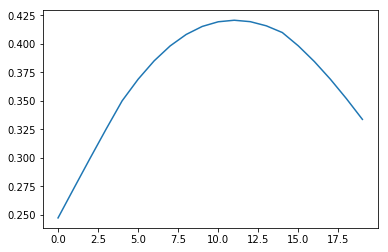

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from Channel_Modified import Static_Channel

hc = [(0.1,0),(0.25,1),(0.16,2),(0.08,3),(0.04,4)]
oversampling_factor = 10
channel = Static_Channel(len(hc), hc, "rc", oversampling_factor=oversampling_factor)
#setting a very high SNR to find the true sampling point
channel.set_snr(100)
sequence_len = 2
a = np.array([1,1])
channel.transmit(a)
print(a)

b = channel.receive()
plt.plot(b)
print(b)
print(len(b))

In [10]:
#index der aussagt, wo in der Impulsantwort der größte Peak zu erwarten ist
print("max_ind3x ", max_index)

start = int(np.argmax(channel.channel_response) - int(0.5*oversampling_factor))
stop  = int(start+ oversampling_factor*sequence_len)
print("start ", start)
print("stop ", stop)
b = b[start:stop]
plt.plot(b)
print("b shape ",b.shape)
b = b.reshape(sequence_len,-1)
print("")
print(b)

NameError: name 'max_index' is not defined

In [ ]:
print(np.argmax(channel.channel_response))

In [1]:
from Channel_Modified import Static_Channel

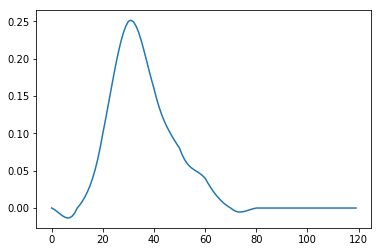

In [3]:
hc = [(0.1,0),(0.25,1),(0.16,2),(0.08,3),(0.04,4)]
oversampling_factor = 10
channel = Static_Channel(len(hc), hc, "rc", oversampling_factor=oversampling_factor)
channel.set_snr(100)

a = np.array([1,0,0,0])
channel.transmit(a)
b, start, stop = channel.receive()

import matplotlib.pyplot as plt
plt.plot(b)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Channel_Modified import Static_Channel

26 126
(5,)
(14,)


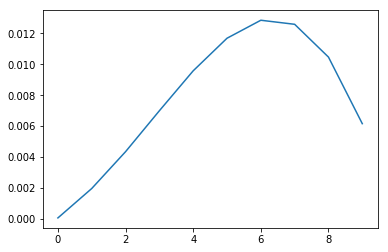

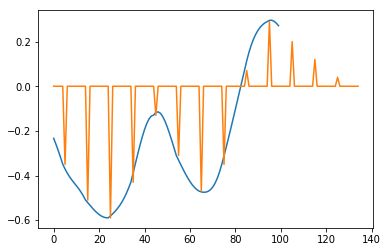

In [7]:
hc_1 = [(1,1),(0.5,2)]
hc_2 = [(1,0),(0.5,1)]
hc_a = [(0.1,0),(0.25,1),(0.16,2),(0.08,3),(0.04,4)]

channel_1 = Static_Channel(len(hc_a), hc_a, "rc", 10)
channel_2 = Static_Channel(len(hc_a), hc_a, "rc", 10)
channel_1.set_snr(30)
channel_2.set_snr(30)

a = np.array([-1, -1, -1, -1,  1, -1, -1, -1,  1,  1])
channel_1.transmit(a)
channel_2.transmit(a)

b_1, start1, stop1 = channel_1.receive()
b_2, start2, stop2 = channel_2.receive()

plt.figure()
plt.plot(b_1[0:10])
print(start1, stop1)

plt.figure()
plt.plot(b_2[start2:stop2])

c = np.array([x[0] for x in hc_a])
print(c.shape)
c = np.convolve(c, a)
print(c.shape)
c = c.reshape(len(c),-1)
c = np.pad(c,[(0,0),(0, 9)], 'constant',constant_values=(0))
c = c.flatten()
c = c[np.argmax([x[0] for x in hc_a])*10-5:]
plt.plot(c)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Channel_Modified import Static_Channel
from Advanced_Interference_Channel import Advanced_Interference_Channel

75


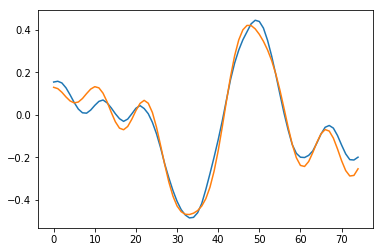

In [9]:
hc = [(1,0),(0.5,1)]
hc_a = [(0.1,0),(0.25,1),(0.16,2),(0.08,3),(0.04,4)]
channel_1 = Static_Channel(len(hc_a), hc_a, "rc", 5)
channel_1.set_snr(30)

channel_2 = Advanced_Interference_Channel(memory_length=5, memory_coefficients=[0.1,0.25, 0.16, 0.08, 0.04])
channel_2.noise_variance = 1/(10**3)    #snr 30

a = np.array([1, -1, 1, -1,  1, -1, -1, -1,  1,  1,1,-1,-1,1,-1])

channel_1.transmit(a)
b = channel_1.receive()

channel_2.transmit(a, 1,1)
c = channel_2.receive(0.2)

start = int(np.argmax(channel_1.channel_response) - int(0.5*channel_1.oversampling_fact))
stop  = int(start+ len(channel_1.sequence))
b = b[start:stop]

start = int((2*10+1)*1/0.2 - int(0.5/0.2))
stop  = int(start+ len(a)*5)
c = c[start:stop]

plt.figure()
plt.plot(b)
plt.plot(c)

In [8]:
from Channel_Modified import Static_Channel
import numpy as np

[ 1.69364597e-12 -1.95910769e-03 -4.41321020e-03 -7.14131072e-03
 -9.81227058e-03 -1.20042175e-02 -1.32396306e-02 -1.30335311e-02
 -1.09500790e-02 -6.66120733e-03  2.15179293e-11  6.05981157e-03
  1.34553296e-02  2.20361500e-02  3.16203014e-02  4.20147614e-02
  5.30317071e-02  6.44974373e-02  7.62522960e-02  8.81416744e-02
  1.00000000e-01  1.15353500e-01  1.31175231e-01  1.46738398e-01
  1.61042528e-01  1.72860733e-01  1.80830735e-01  1.83583426e-01
  1.79896417e-01  1.68854995e-01  1.50000000e-01  1.27947870e-01
  1.00073651e-01  6.72416640e-02  3.06217774e-02 -8.40295233e-03
 -4.83462500e-02 -8.77327097e-02 -1.25202399e-01 -1.59594243e-01
 -1.90000000e-01 -2.16162368e-01 -2.36478434e-01 -2.50991003e-01
 -2.60025528e-01 -2.64092786e-01 -2.63791786e-01 -2.59726409e-01
 -2.52445605e-01 -2.42412173e-01 -2.30000000e-01 -2.13435833e-01
 -1.93122734e-01 -1.69923385e-01 -1.45057939e-01 -1.20042175e-01
 -9.65780647e-02 -7.64056281e-02 -6.11312751e-02 -5.20523907e-02
 -5.00000000e-02 -5.02918

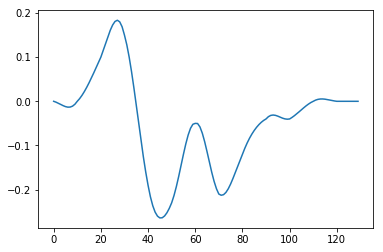

In [11]:
hc_a = [(0.1,0),(0.25,1),(0.16,2),(0.08,3),(0.04,4)]
channel_1 = Static_Channel(len(hc_a), hc_a, "rc", 1)

seq = np.random.choice([-1,1], 5)
channel.transmit(seq)

rec_seq, start, stop = channel.receive()

print(rec_seq)

plt.plot(rec_seq)

In [2]:
def digitize(sequence, high, low, bits):
    bins = np.linspace(low, high, 2**bits)
    for i in range(len(sequence)):
        bin_index = np.argmin(np.abs(bins-sequence[i]))
        sequence[i] = bins[bin_index]
    sequence = sequence/high
    
    return sequence

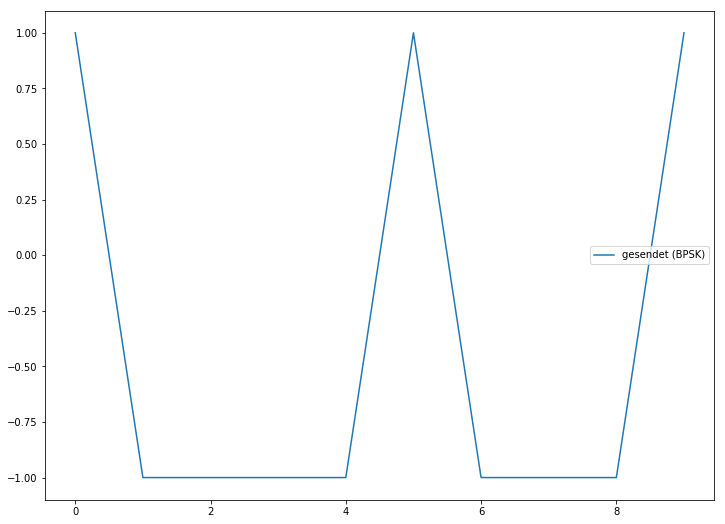

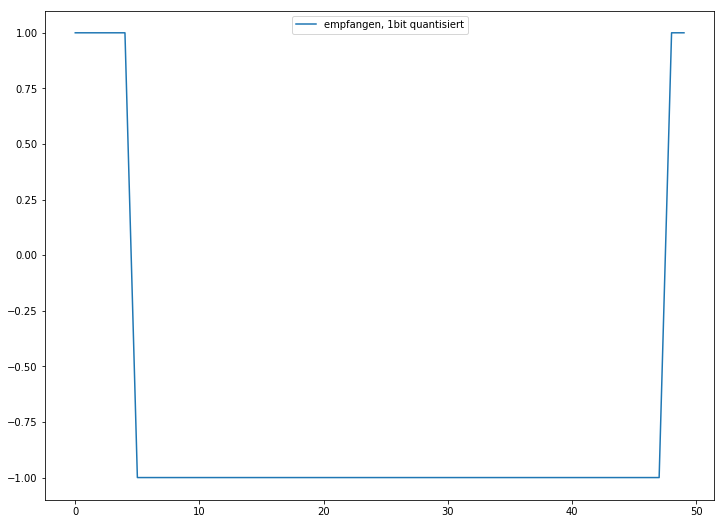

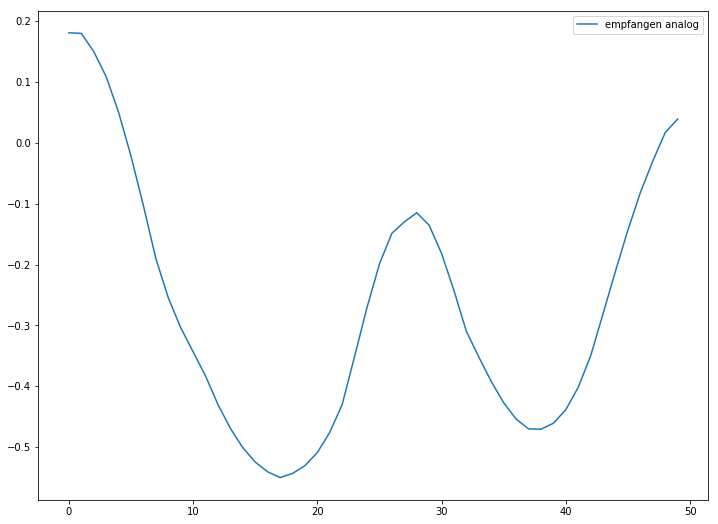

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from Channel_Modified import Static_Channel

oversampling_factor = 5
hc_a = [(0.1,0),(0.25,1),(0.16,2),(0.08,3),(0.04,4)]
maximum = sum([x[0] for x in hc_a])
minimum = -maximum
channel = Static_Channel(len(hc_a), hc_a, "rc", oversampling_factor )
channel.set_snr(100)

send_seq = np.random.choice([-1,1], 10)
#send_seq = np.array([-1,1]*10)
channel.transmit(send_seq)
recv_seq_ana = channel.receive()
recv_seq = digitize(recv_seq_ana.copy(), maximum, minimum, 1)
recv_seq = recv_seq.reshape(-1, oversampling_factor)
recv_seq_mean = np.mean(recv_seq.copy(), axis=1)

fig, ax = plt.subplots(figsize=(12,9))
ax.plot(send_seq, label="gesendet (BPSK)")
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12,9))
ax.plot(recv_seq.flatten(), label="empfangen, 1bit quantisiert")
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(12,9))
ax.plot(recv_seq_ana, label="empfangen analog")
plt.legend()
plt.show()

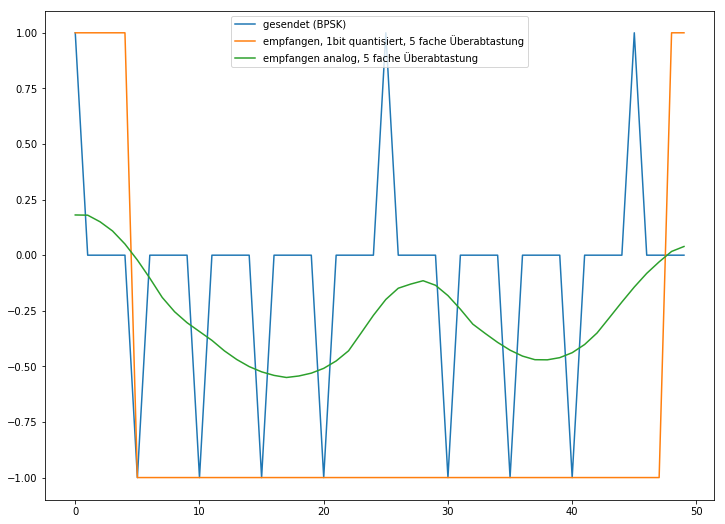

In [20]:
send_seq = send_seq.reshape(-1,1)
send_seq = np.pad(send_seq,[(0,0),(0, 5-1)], 'constant',constant_values=(0))
send_seq = send_seq.flatten()

fig, ax = plt.subplots(figsize=(12,9))
ax.plot(send_seq, label="gesendet (BPSK)")
ax.plot(recv_seq.flatten(), label="empfangen, 1bit quantisiert, 5 fache Überabtastung")
ax.plot(recv_seq_ana, label="empfangen analog, 5 fache Überabtastung")
plt.legend()
plt.show()

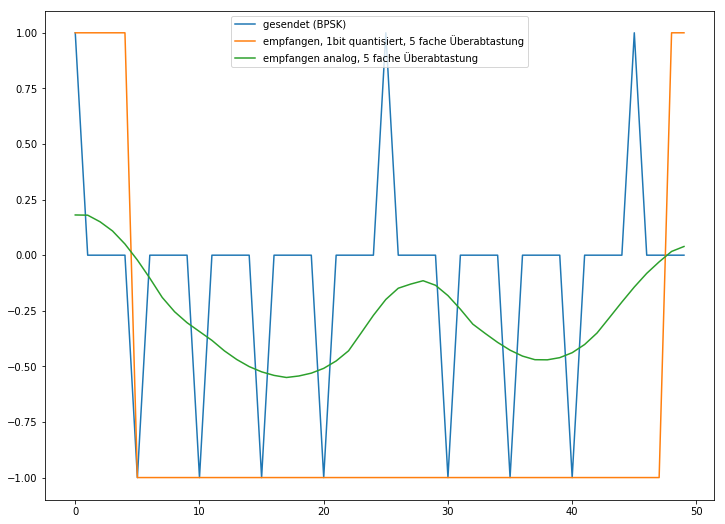

In [22]:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(send_seq, label="gesendet (BPSK)")
ax.plot(recv_seq.flatten(), label="empfangen, 1bit quantisiert, 5 fache Überabtastung")
ax.plot(recv_seq_ana, label="empfangen analog, 5 fache Überabtastung")
plt.legend()
plt.savefig("beispiel_informationsverlust.pdf")